In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_k_closest_points(X,p,k):
    """
    - Find Distance
    - Sort based on distance
    - Return index of k nearest neighbours
    """
    distances = np.sqrt(np.sum(( p - X )**2,axis=1))
    sorted_indexes = np.argsort(distances)
    return sorted_indexes[:k]

def KNN(X,y,p,k):
    """
    - Find k closest points
    - Find votes fo those points
    - Make decision based on those points
    """
    k_indexes  = find_k_closest_points(X,p,k)
    neighbour_votes = y[k_indexes]
    votes, counts = np.unique(neighbour_votes,return_counts=True)
    decision = votes[np.argmax(counts)]
    return decision,neighbour_votes,k_indexes

In [6]:
#data generation
n = 100
mean_1=np.array([30,40])
cov_1 = np.array([[30,0.8],[0.8,30]])
class_1_data = np.random.multivariate_normal(mean_1,cov_1,n//2)

mean_2=np.array([60,50])
cov_2 = np.array([[10,0.5],[0.5,10]])
class_2_data = np.random.multivariate_normal(mean_2,cov_2,n//2)

X = np.concatenate((class_1_data,class_2_data),axis=0)
y = np.concatenate((np.zeros(n//2),np.ones(n//2)))

In [7]:
new_point = np.array([44,48])
decision,votes,k_indexes = KNN(X,y,new_point,15)

Text(0.5, 1.0, 'The point has been assigned to Class: 1')

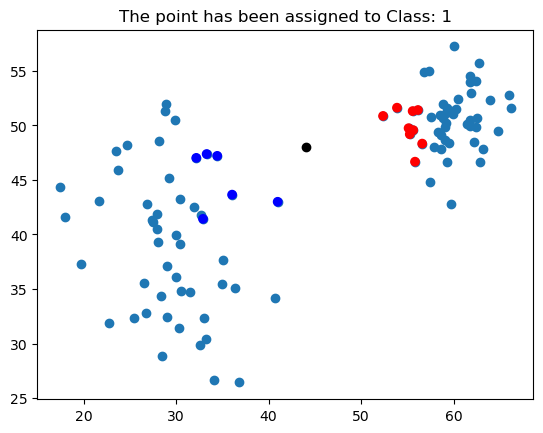

In [8]:
nearest_neighbour= X[k_indexes]
plt.scatter(X[:,0],X[:,1])
plt.scatter(new_point[0],new_point[1],color="black")
plt.scatter(nearest_neighbour[:,0],nearest_neighbour[:,1], c=votes, cmap='bwr')
plt.title(f"The point has been assigned to Class: {int(decision)}")